# Session 5 Exercises

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# specifying file name
file = 'data/Ames Housing Dataset.xlsx'

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the file into Python
housing = pd.read_excel(file)

## 1
Experiment with different feature combinations to get the best performance out of the housing dataset

## 2
Look at the distribution of the output variable (Sale Price). Is it normal distributed?

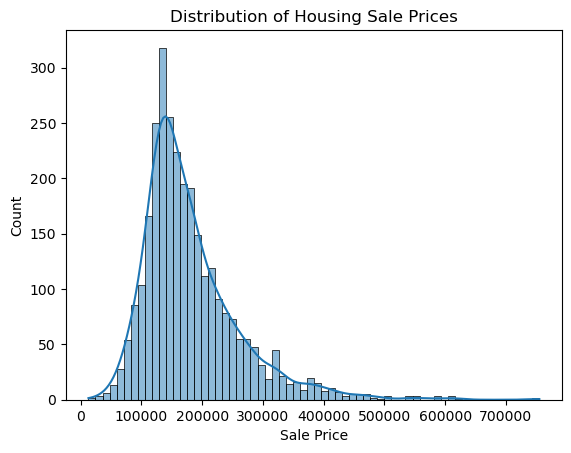

In [2]:
# developing a histogram using HISTPLOT
sns.histplot(data   = housing,
             x      = 'Sale_Price',
             kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "Sale Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

## 3
Transform the Sale Price using a logarithmic transformation (`np.log`). Look at the distribution after the transformation. Retrain the modell and evaluate the difference.

In [3]:
# log transforming Sale_Price and saving it to the dataset
housing['log_Sale_Price'] = np.log(housing['Sale_Price'])

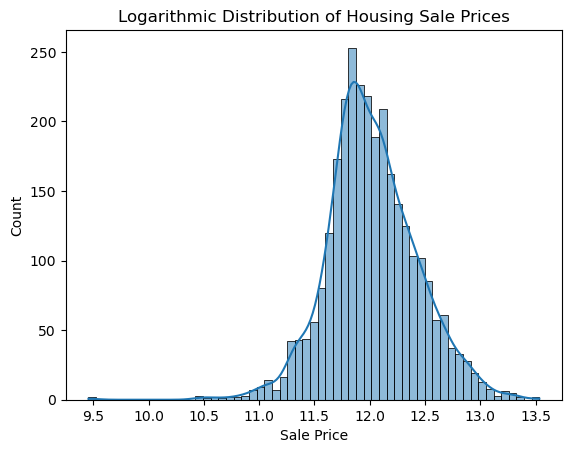

In [4]:
# developing a histogram using HISTPLOT
sns.histplot(data   = housing,
             x      = 'log_Sale_Price',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "Sale Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [6]:
# Filling them with the median column value

housing['Mas_Vnr_Area'] = (housing['Mas_Vnr_Area']
                           .fillna(housing['Mas_Vnr_Area']
                                   .median()))
housing['Total_Bsmt_SF'] = (housing['Total_Bsmt_SF']
                            .fillna(housing['Total_Bsmt_SF']
                                    .median()))
housing['Garage_Cars'] = (housing['Garage_Cars']
                          .fillna(housing['Garage_Cars']
                                  .median()))
housing['Garage_Area'] = (housing['Garage_Area']
                          .fillna(housing['Garage_Area']
                                  .median()))

# x-variables
x_var = ['Order',
         'Lot_Area',
         #'Street',
         #'Lot_Config',
         #'Neighborhood',
         'Overall_Qual',
         'Overall_Cond',
         'Mas_Vnr_Area',
         'Total_Bsmt_SF',
         'First_Flr_SF',
         'Second_Flr_SF',
         'Gr_Liv_Area',
         'Full_Bath',
         'Half_Bath',
         'Kitchen_AbvGr',
         'TotRms_AbvGr',
         'Fireplaces',
         'Garage_Cars',
         'Garage_Area',
         'Porch_Area',
         'Pool_Area']

y_data = housing.loc[ : , 'log_Sale_Price']
x_data = housing.loc[ : , x_var]

x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x_train, y_train)

# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.    0.    0.12  0.04  0.    0.    0.    0.   -0.    0.09  0.07 -0.12
  0.01  0.05  0.07  0.    0.   -0.  ]
Intercept: 10.42
Root mean squared error:  0.024
R2 score:  0.857


## 4

Analyse the features for skewness and transform the highly skewed features. Retrain the modell and evaluate the difference.

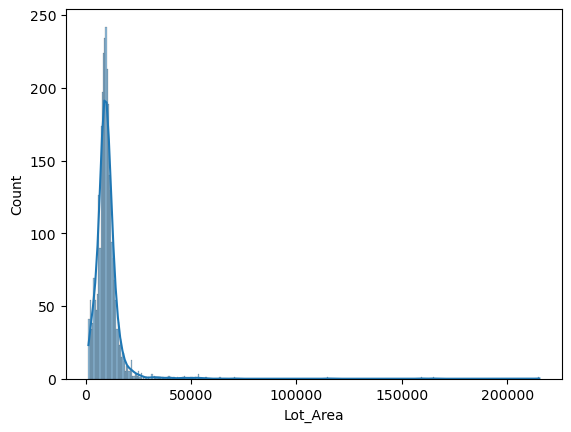

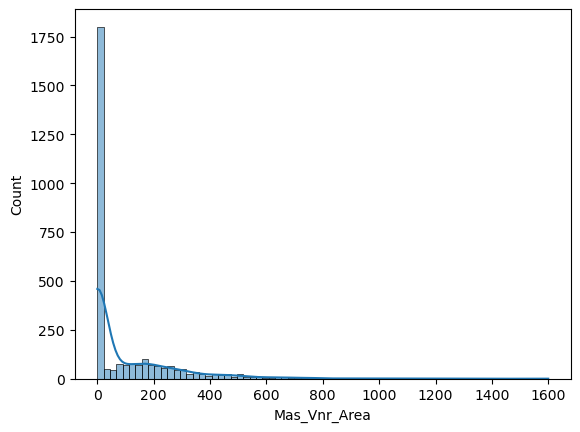

In [7]:
# histogram for Lot_Area (skewed positive)
sns.histplot(data   = housing,
             x      = 'Lot_Area',
             kde    = True)


# rendering the plot
plt.show()


# histogram for Mas_Vnr_Area (zero inflated and skewed positive)
sns.histplot(data   = housing,
             x      = 'Mas_Vnr_Area',
             kde    = True)


# rendering the plot
plt.show()

In [8]:
# log transforming Lot_Area and saving it to the dataset
housing['log_Lot_Area'] = np.log(housing['Lot_Area'])


# log transforming Mas_Vnr_Area and saving it to the dataset
housing['log_Mas_Vnr_Area'] = np.log(housing['Mas_Vnr_Area'] + 0.001)

In [9]:
# Filling them with the median column value

housing['Mas_Vnr_Area'] = (housing['Mas_Vnr_Area']
                           .fillna(housing['Mas_Vnr_Area']
                                   .median()))
housing['Total_Bsmt_SF'] = (housing['Total_Bsmt_SF']
                            .fillna(housing['Total_Bsmt_SF']
                                    .median()))
housing['Garage_Cars'] = (housing['Garage_Cars']
                          .fillna(housing['Garage_Cars']
                                  .median()))
housing['Garage_Area'] = (housing['Garage_Area']
                          .fillna(housing['Garage_Area']
                                  .median()))

# x-variables
x_var = ['Order',
         #'Lot_Area',
         'log_Lot_Area',
         #'Street',
         #'Lot_Config',
         #'Neighborhood',
         'Overall_Qual',
         'Overall_Cond',
         #'Mas_Vnr_Area',
         'log_Mas_Vnr_Area',
         'Total_Bsmt_SF',
         'First_Flr_SF',
         'Second_Flr_SF',
         'Gr_Liv_Area',
         'Full_Bath',
         'Half_Bath',
         'Kitchen_AbvGr',
         'TotRms_AbvGr',
         'Fireplaces',
         'Garage_Cars',
         'Garage_Area',
         'Porch_Area',
         'Pool_Area']

y_data = housing.loc[ : , 'log_Sale_Price']
x_data = housing.loc[ : , x_var]

x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x_train, y_train)

# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.    0.09  0.12  0.04  0.    0.    0.    0.   -0.    0.1   0.07 -0.11
 -0.    0.04  0.07  0.    0.   -0.  ]
Intercept: 9.71
Root mean squared error:  0.023
R2 score:  0.861


## 5
Find the features that have a high amount of zero values. Engineer flag features (boolean) for all variables that have at least 100 observations in both the 'yes' and 'no' columns. Check the correlations of these new features with sale price. Retrain the modell and evaluate the difference.

In [13]:
# counting the number of zeroes
bsmt_zeroes   = len(housing['Total_Bsmt_SF'][housing['Total_Bsmt_SF'] == 0])
sf_zeroes     = len(housing['Second_Flr_SF'][housing['Second_Flr_SF'] == 0])
garage_zeroes = len(housing['Garage_Area'][housing['Garage_Area'] == 0])
pool_zeroes   = len(housing['Pool_Area'][housing['Pool_Area'] == 0])
mas_zeroes    = len(housing['Mas_Vnr_Area'][housing['Mas_Vnr_Area'] == 0])
porch_zeroes  = len(housing['Porch_Area'][housing['Porch_Area'] == 0])


## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Basement       | {bsmt_zeroes}\t\t{len(housing) - bsmt_zeroes}
Second Floor   | {sf_zeroes}\t\t{len(housing) - sf_zeroes}
Garage         | {garage_zeroes}\t\t{len(housing) - garage_zeroes}
Pool           | {pool_zeroes}\t\t{len(housing) - pool_zeroes}
Masonic Veneer | {mas_zeroes}\t\t{len(housing) - mas_zeroes}
Porch          | {porch_zeroes}\t\t{len(housing) - porch_zeroes}
""")


                 No		Yes
               ---------------------
Basement       | 79		2851
Second Floor   | 1678		1252
Garage         | 157		2773
Pool           | 2917		13
Masonic Veneer | 1771		1159
Porch          | 484		2446



In [14]:
# placeholder variables
housing['has_Second_Flr'] = 0
housing['has_Garage']     = 0
housing['has_Mas_Vnr']    = 0
housing['has_Porch']      = 0


for index, value in housing.iterrows():
    

    # Second_Flr_SF
    if housing.loc[index, 'Second_Flr_SF'] > 0:
        housing.loc[index, 'has_Second_Flr'] = 1
        
        
    # Garage_Area
    if housing.loc[index, 'Garage_Area'] > 0:
        housing.loc[index, 'has_Garage'] = 1
        
        
    # Mas_Vnr_Area
    if housing.loc[index, 'Mas_Vnr_Area'] > 0:
        housing.loc[index, 'has_Mas_Vnr'] = 1
        
        
    # Porch_Area
    if housing.loc[index, 'Porch_Area'] > 0:
        housing.loc[index, 'has_Porch'] = 1

In [15]:
# developing a small correlation matrix
zeroes_corr = housing.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['Sale_Price',                   # Y-variable
               ['has_Second_Flr', 'has_Garage', # X-variables
                'has_Mas_Vnr', 'has_Porch']] \
                .sort_values(ascending = False)

has_Mas_Vnr       0.391982
has_Porch         0.256517
has_Garage        0.225950
has_Second_Flr    0.089489
Name: Sale_Price, dtype: float64

In [17]:
# Filling them with the median column value

housing['Mas_Vnr_Area'] = (housing['Mas_Vnr_Area']
                           .fillna(housing['Mas_Vnr_Area']
                                   .median()))
housing['Total_Bsmt_SF'] = (housing['Total_Bsmt_SF']
                            .fillna(housing['Total_Bsmt_SF']
                                    .median()))
housing['Garage_Cars'] = (housing['Garage_Cars']
                          .fillna(housing['Garage_Cars']
                                  .median()))
housing['Garage_Area'] = (housing['Garage_Area']
                          .fillna(housing['Garage_Area']
                                  .median()))

# x-variables
x_var = ['Order',
         #'Lot_Area',
         'log_Lot_Area',
         #'Street',
         #'Lot_Config',
         #'Neighborhood',
         'Overall_Qual',
         'Overall_Cond',
         #'Mas_Vnr_Area',
         'log_Mas_Vnr_Area',
         'has_Mas_Vnr',
         'Total_Bsmt_SF',
         'First_Flr_SF',
         'Second_Flr_SF',
         'has_Second_Flr',
         'Gr_Liv_Area',
         'Full_Bath',
         'Half_Bath',
         'Kitchen_AbvGr',
         'TotRms_AbvGr',
         'Fireplaces',
         'Garage_Cars',
         'Garage_Area',
         'has_Garage',
         'Porch_Area',
         'has_Porch',
         'Pool_Area']

y_data = housing.loc[ : , 'log_Sale_Price']
x_data = housing.loc[ : , x_var]

x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x_train, y_train)

# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.    0.08  0.12  0.04  0.   -0.01  0.    0.    0.   -0.11 -0.    0.1
  0.07 -0.11  0.    0.04  0.07  0.    0.01  0.    0.   -0.  ]
Intercept: 9.8
Root mean squared error:  0.023
R2 score:  0.863


## 6
Add a feature for the total number of bathrooms:
~~~
Total_Baths = Full_Baths + (Half_Baths / 2)
~~~
Analyse the relationship between the Total number of bathrooms and the Sale Price.
Retrain the modell and evaluate the difference.

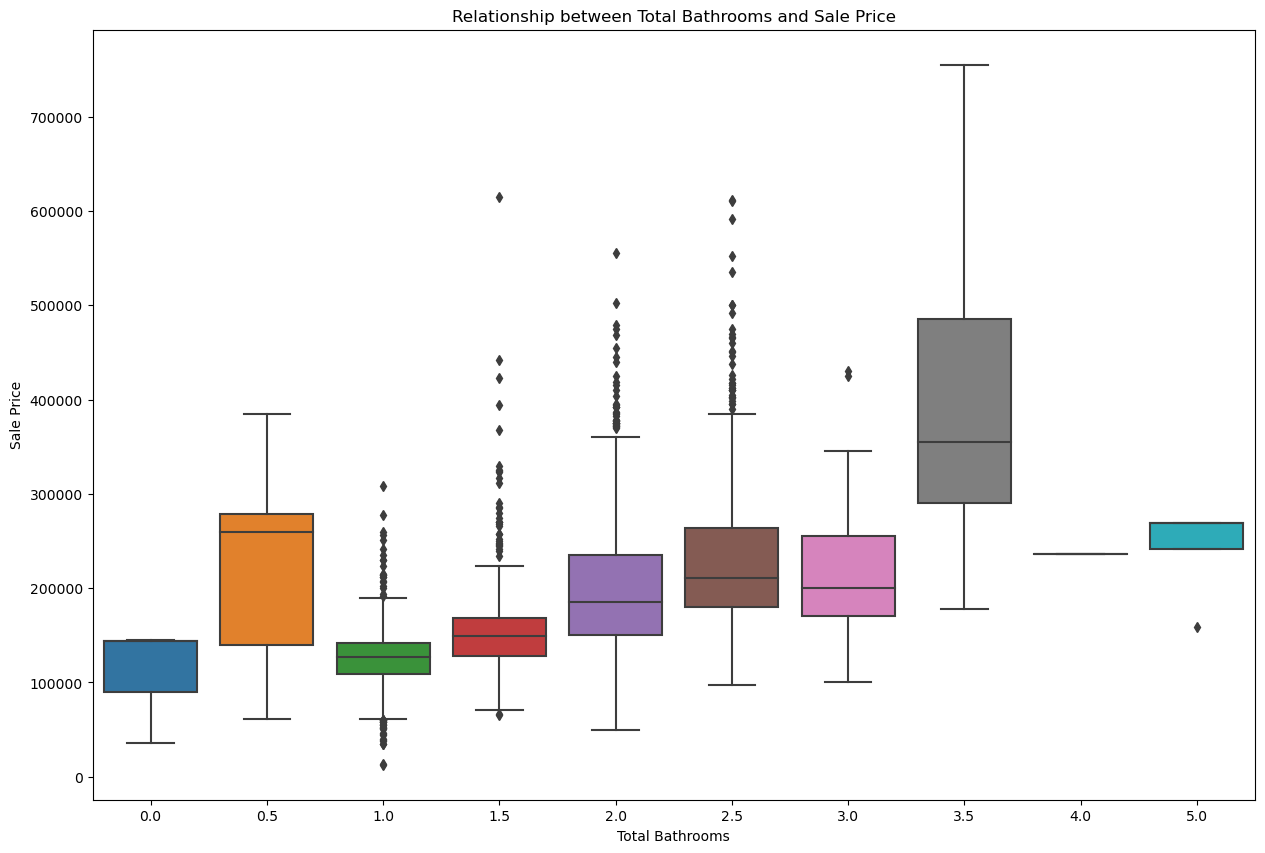

In [19]:
# total bathrooms
housing['Total_Bath'] = housing['Full_Bath'] + (housing['Half_Bath'] / 2)


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'Total_Bath',
            y    = 'Sale_Price',
            data = housing)



# titles and labels
plt.title(label   = 'Relationship between Total Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Total Bathrooms')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix
bath_corr = housing.loc[ : , ['Full_Bath',
                              'Half_Bath',
                              'Total_Bath',
                              'Sale_Price']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)

In [20]:
# Filling them with the median column value

housing['Mas_Vnr_Area'] = (housing['Mas_Vnr_Area']
                           .fillna(housing['Mas_Vnr_Area']
                                   .median()))
housing['Total_Bsmt_SF'] = (housing['Total_Bsmt_SF']
                            .fillna(housing['Total_Bsmt_SF']
                                    .median()))
housing['Garage_Cars'] = (housing['Garage_Cars']
                          .fillna(housing['Garage_Cars']
                                  .median()))
housing['Garage_Area'] = (housing['Garage_Area']
                          .fillna(housing['Garage_Area']
                                  .median()))

# x-variables
x_var = ['Order',
         #'Lot_Area',
         'log_Lot_Area',
         #'Street',
         #'Lot_Config',
         #'Neighborhood',
         'Overall_Qual',
         'Overall_Cond',
         #'Mas_Vnr_Area',
         'log_Mas_Vnr_Area',
         'has_Mas_Vnr',
         'Total_Bsmt_SF',
         'First_Flr_SF',
         'Second_Flr_SF',
         'has_Second_Flr',
         'Gr_Liv_Area',
         'Full_Bath',
         'Half_Bath',
         'Total_Bath',
         'Kitchen_AbvGr',
         'TotRms_AbvGr',
         'Fireplaces',
         'Garage_Cars',
         'Garage_Area',
         'has_Garage',
         'Porch_Area',
         'has_Porch',
         'Pool_Area']

y_data = housing.loc[ : , 'log_Sale_Price']
x_data = housing.loc[ : , x_var]

x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x_train, y_train)

# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.    0.08  0.12  0.04  0.   -0.01  0.    0.    0.   -0.11 -0.    0.04
  0.04  0.06 -0.11  0.    0.04  0.07  0.    0.01  0.    0.   -0.  ]
Intercept: 9.8
Root mean squared error:  0.023
R2 score:  0.863


## 7
Add one-hot encoded features. Retrain the modell and evaluate the difference.

In [39]:
# Filling them with the median column value

housing['Mas_Vnr_Area'] = (housing['Mas_Vnr_Area']
                           .fillna(housing['Mas_Vnr_Area']
                                   .median()))
housing['Total_Bsmt_SF'] = (housing['Total_Bsmt_SF']
                            .fillna(housing['Total_Bsmt_SF']
                                    .median()))
housing['Garage_Cars'] = (housing['Garage_Cars']
                          .fillna(housing['Garage_Cars']
                                  .median()))
housing['Garage_Area'] = (housing['Garage_Area']
                          .fillna(housing['Garage_Area']
                                  .median()))

# x-variables
x_var = ['Order',
         #'Lot_Area',
         'log_Lot_Area',
         'Street',
         'Lot_Config',
         'Neighborhood',
         'Overall_Qual',
         'Overall_Cond',
         #'Mas_Vnr_Area',
         'log_Mas_Vnr_Area',
         'has_Mas_Vnr',
         'Total_Bsmt_SF',
         'First_Flr_SF',
         'Second_Flr_SF',
         'has_Second_Flr',
         'Gr_Liv_Area',
         'Full_Bath',
         'Half_Bath',
         'Total_Bath',
         'Kitchen_AbvGr',
         'TotRms_AbvGr',
         'Fireplaces',
         'Garage_Cars',
         'Garage_Area',
         'has_Garage',
         'Porch_Area',
         'has_Porch',
         'Pool_Area']

y_data = housing.loc[ : , 'log_Sale_Price']
x_data = housing.loc[ : , x_var]

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = x_data.index

# Ensure we have proper column names
OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)

# Remove categorical columns (will replace with one-hot encoding)
num_X = x_data.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
            OH_X, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x_train, y_train)

# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.    0.07  0.09  0.05  0.   -0.02  0.    0.    0.   -0.04  0.    0.02
  0.02  0.03 -0.08  0.    0.04  0.05  0.    0.01  0.    0.01 -0.   -0.11
  0.11 -0.    0.04 -0.03 -0.02  0.01  0.08 -0.07 -0.15 -0.13 -0.    0.05
  0.05 -0.13  0.03  0.05  0.47 -0.27  0.   -0.12 -0.01 -0.06 -0.06 -0.06
  0.13  0.18 -0.21 -0.1  -0.06  0.01  0.12  0.19  0.08  0.01]
Intercept: 9.92
Root mean squared error:  0.019
R2 score:  0.886


## 8

Analyse feature importance and drop unimportant features. Retrain the modell and evaluate the difference.

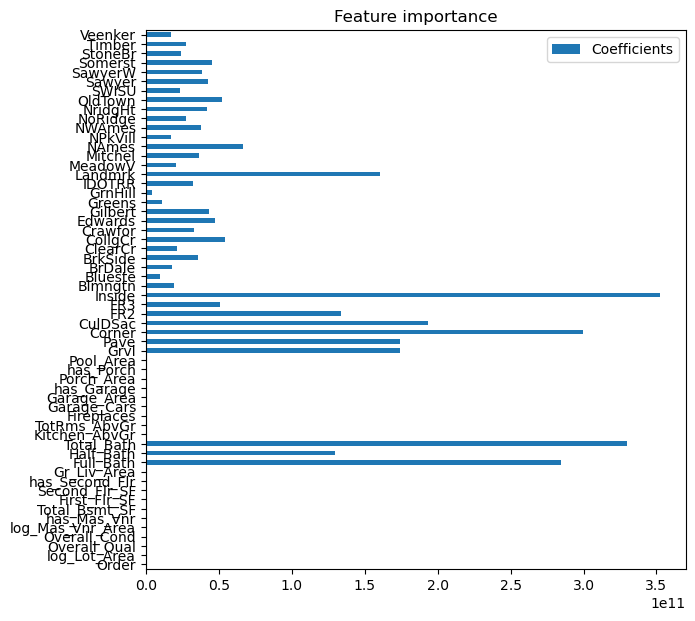

In [41]:
model = make_pipeline(StandardScaler(), LinearRegression())

model.fit(x_train, y_train)

coefs = pd.DataFrame(
   np.abs(model[1].coef_),
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [47]:
x_var = coefs[coefs['Coefficients'] < 0.2].index

In [49]:
y_data = housing.loc[ : , 'log_Sale_Price']
x_data = OH_X.loc[ : , x_var]

x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x_train, y_train)

# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.    0.08  0.13  0.03 -0.    0.05  0.    0.    0.   -0.11 -0.   -0.09
 -0.    0.04  0.1   0.   -0.01  0.    0.01 -0.  ]
Intercept: 9.83
Root mean squared error:  0.024
R2 score:  0.854


## 9

Find the best model.

## 10

Experiment with other regression models. Which one performs best?